# GPT-4 Vision API

GPT-4, 또는 Vision을 포함한 GPT-4V 또는 API라고도 알려져 있는 이 모델은 이미지를 처리하고 이미지에 관한 질문에 답할 수 있는 기능을 갖추고 있습니다. 역사적으로, 언어 모델 시스템은 주로 텍스트만을 사용하는 단일 입력 형식에 제한되어 왔습니다. 이러한 제한 때문에 GPT-4와 같은 모델의 활용 범위가 많은 사용 사례에서 제한되었습니다.

비전 기능을 탑재한 GPT-4는 현재 개발자들이 GPT-4에 접근할 수 있는 Chat Completions API를 통해 모델과 이미지 입력 모두를 지원하는 형태로 업데이트 되었습니다. 반면, Assistants API는 현재 이미지 입력을 지원하지 않습니다.

다음과 같은 사항들을 유념해야 합니다:

- 비전이 탑재된 GPT-4 Turbo는 대화 중 자동으로 삽입되는 시스템 메시지로 인해 GPT-4 Turbo와는 약간 다르게 작동할 수 있습니다.
- 비전이 있는 GPT-4 Turbo는 텍스트 처리 기능에서 GPT-4 Turbo 미리보기 모델과 동일하게 작동하지만, 여기에 비전 기능이 추가되었습니다.
- 비전 기능은 이 모델이 가진 다양한 기능 중 하나일 뿐입니다.

In [1]:
from openai import OpenAI
from IPython.display import Image

client = OpenAI()

## Basic Usage

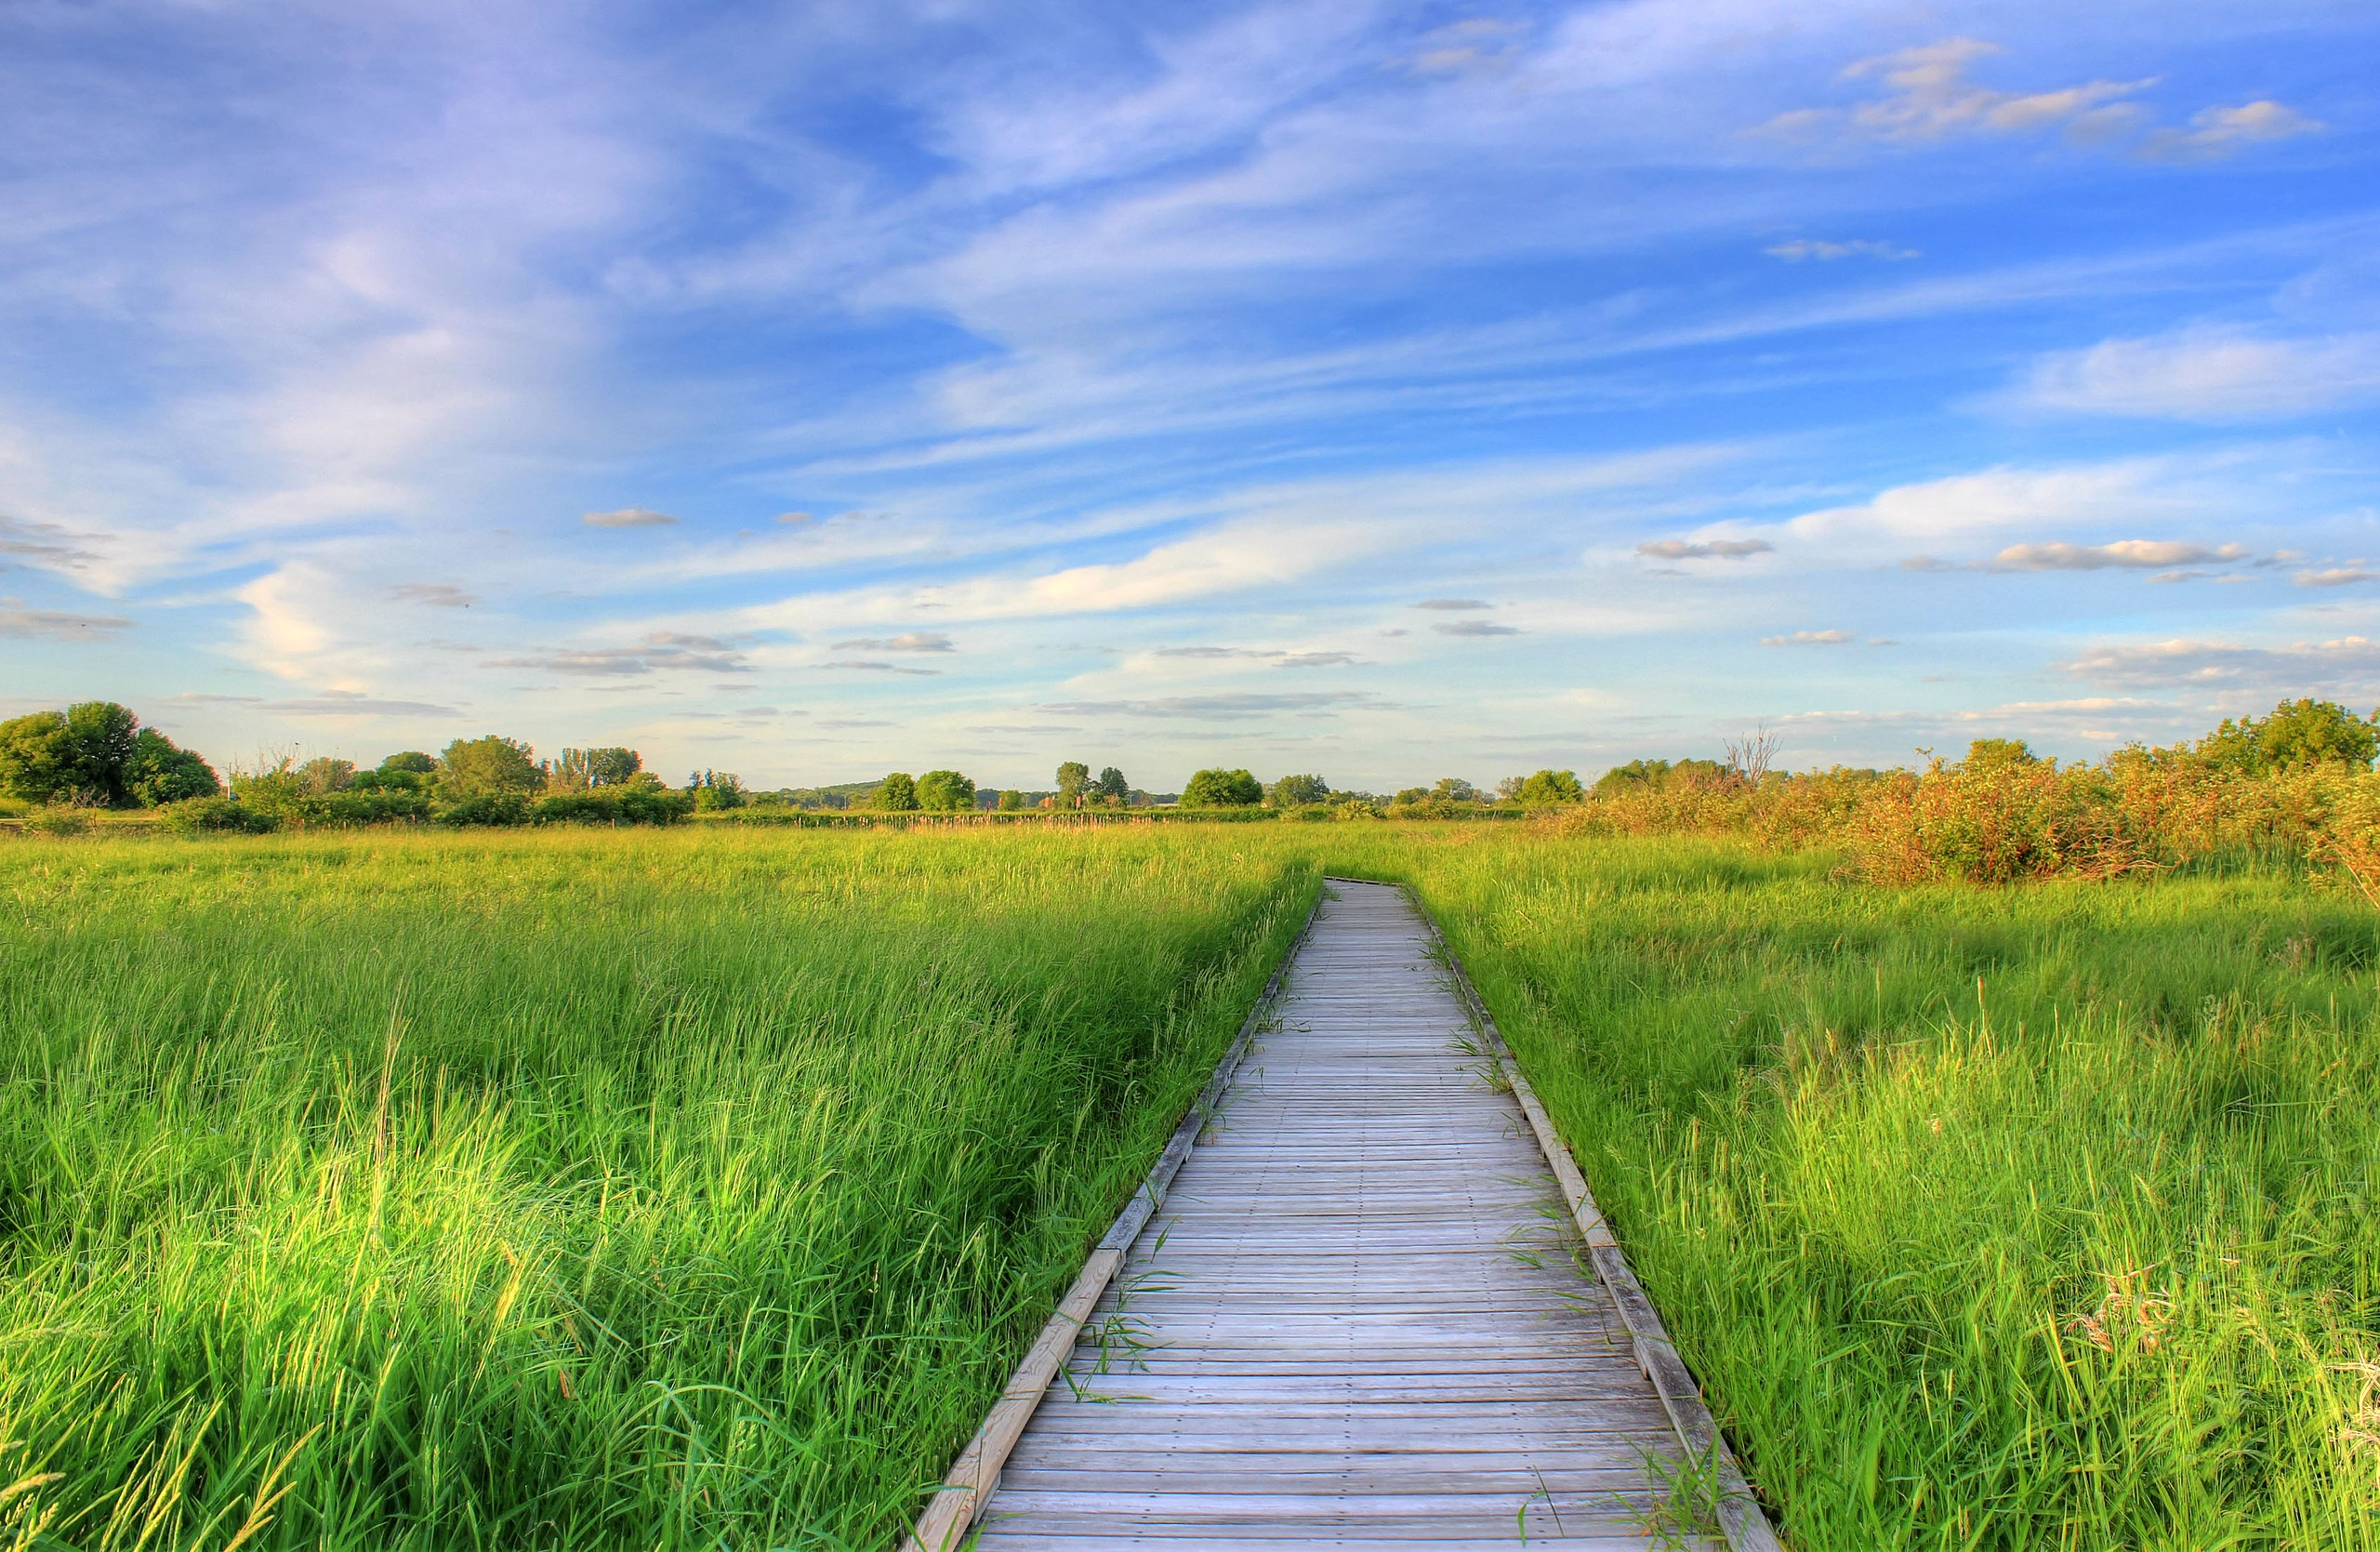

In [2]:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg", width=480)

In [3]:
response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "이 이미지 설명해줘"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [7]:
print(response.choices[0].message.content)

이 이미지는 잘 정비된 목재 보도길이 높은 풀밭을 통과하며 자연 풍경을 관람할 수 있게 해주는 시골 길을 보여주고 있습니다. 보도길은 사진의 전경에서 시작하여 중간 지점을 거쳐 사라지는 지점까지 이어져 있습니다. 주변 환경은 푸른색과 녹색이 주를 이루며, 여기저기 숲과 나무가 보입니다. 멀리 푸른 하늘에는 구름이 떠 있어 맑은 날씨임을 알 수 있습니다. 이 풍경은 사람이 휴식을 취하거나 자연을 감상하기 좋은 장소로 보입니다.


## Local Image 사용하기

In [8]:
image_path = "./sample_img.jpg"

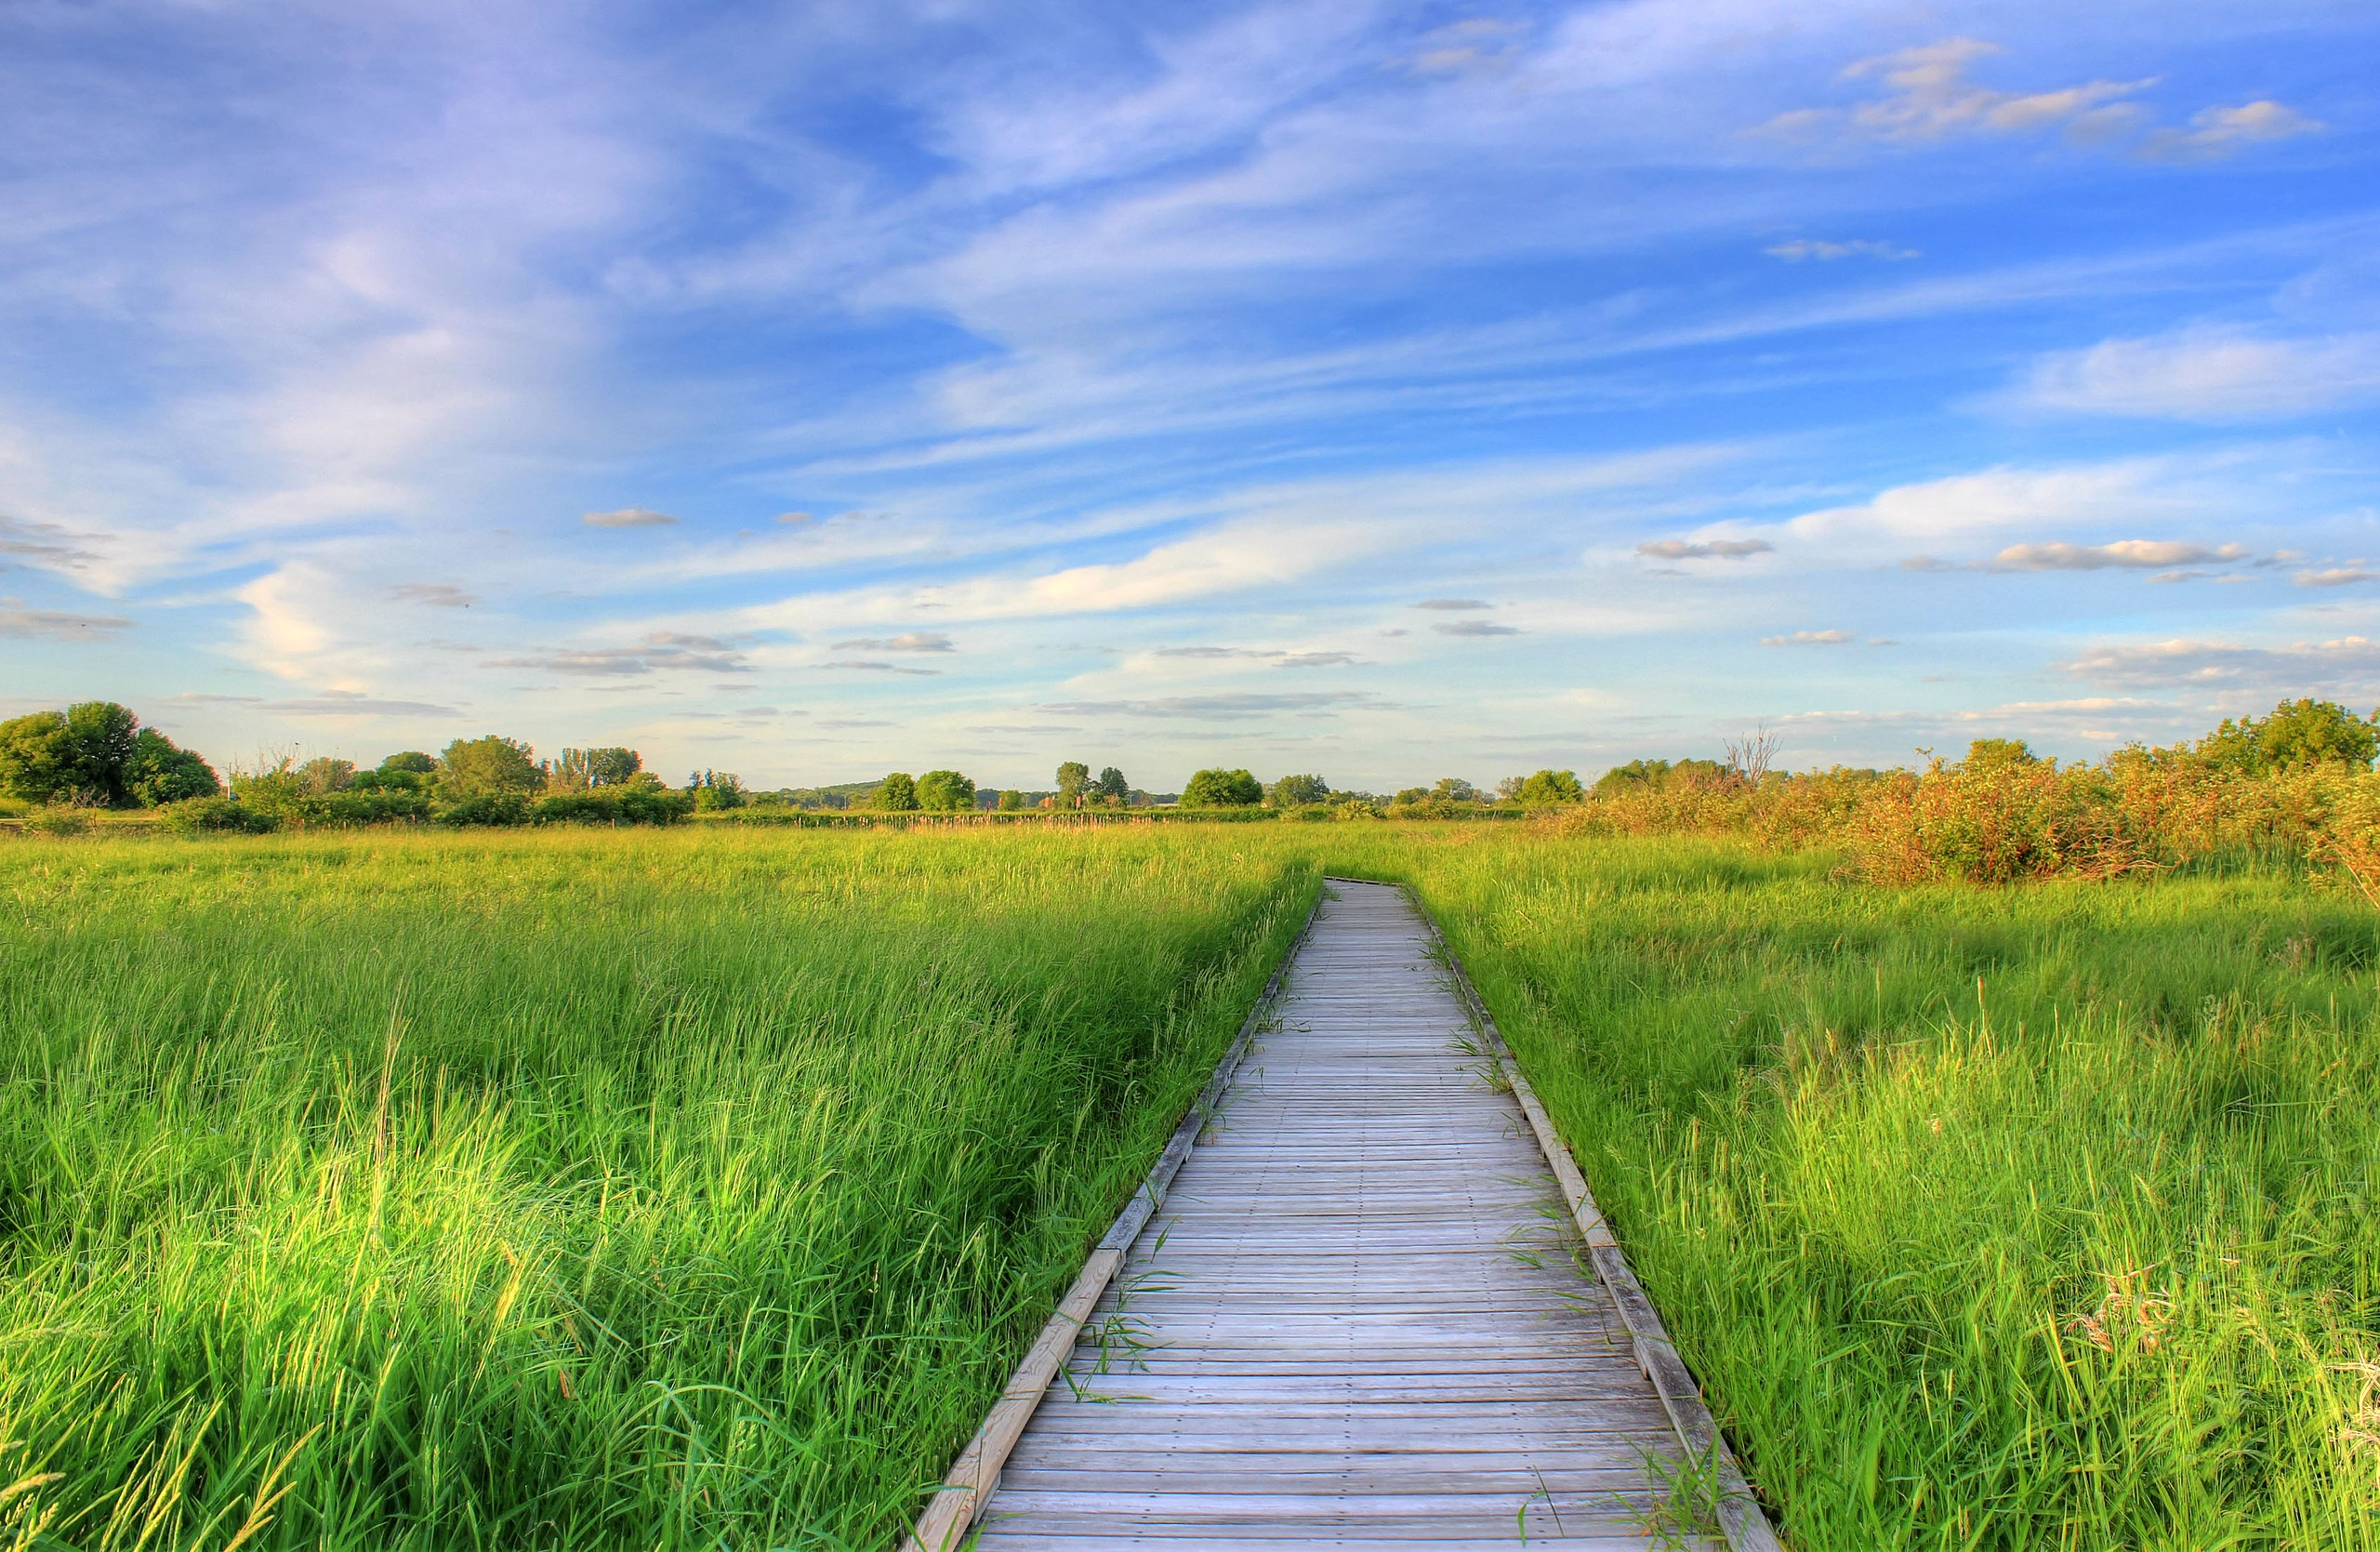

In [9]:
Image(image_path, width=480)

In [10]:
import base64

In [11]:
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

In [12]:
base64_image = encode_image(image_path)

In [13]:
response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "이 이미지 설명해줘"},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [15]:
print(response.choices[0].message.content)

이 이미지는 목재 보드워크가 푸른 초원을 가로질러 이어진 자연 풍경을 보여주고 있습니다. 보드워크는 시선을 사진의 중앙에서 먼 지평선으로 인도하며, 걸어볼 수 있을 것 같은 평화롭고 초대하는 길로 보입니다. 사진은 풍부한 녹색 식물과 선명한 파란 하늘, 그리고 구름이 가볍게 떠 있는 모습으로 자연의 아름다움을 잘 포착하고 있습니다. 이 풍경은 자연을 즐기고 싶은 사람들에게 산책하거나 명상하기에 좋은 장소로 보입니다. 화창한 날씨와 쾌청한 하늘이 전체적으로 평화롭고 상쾌한 분위기를 자아내고 있습니다.


## 여러장의 이미지

In [22]:
img_1_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

In [17]:
img_2_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

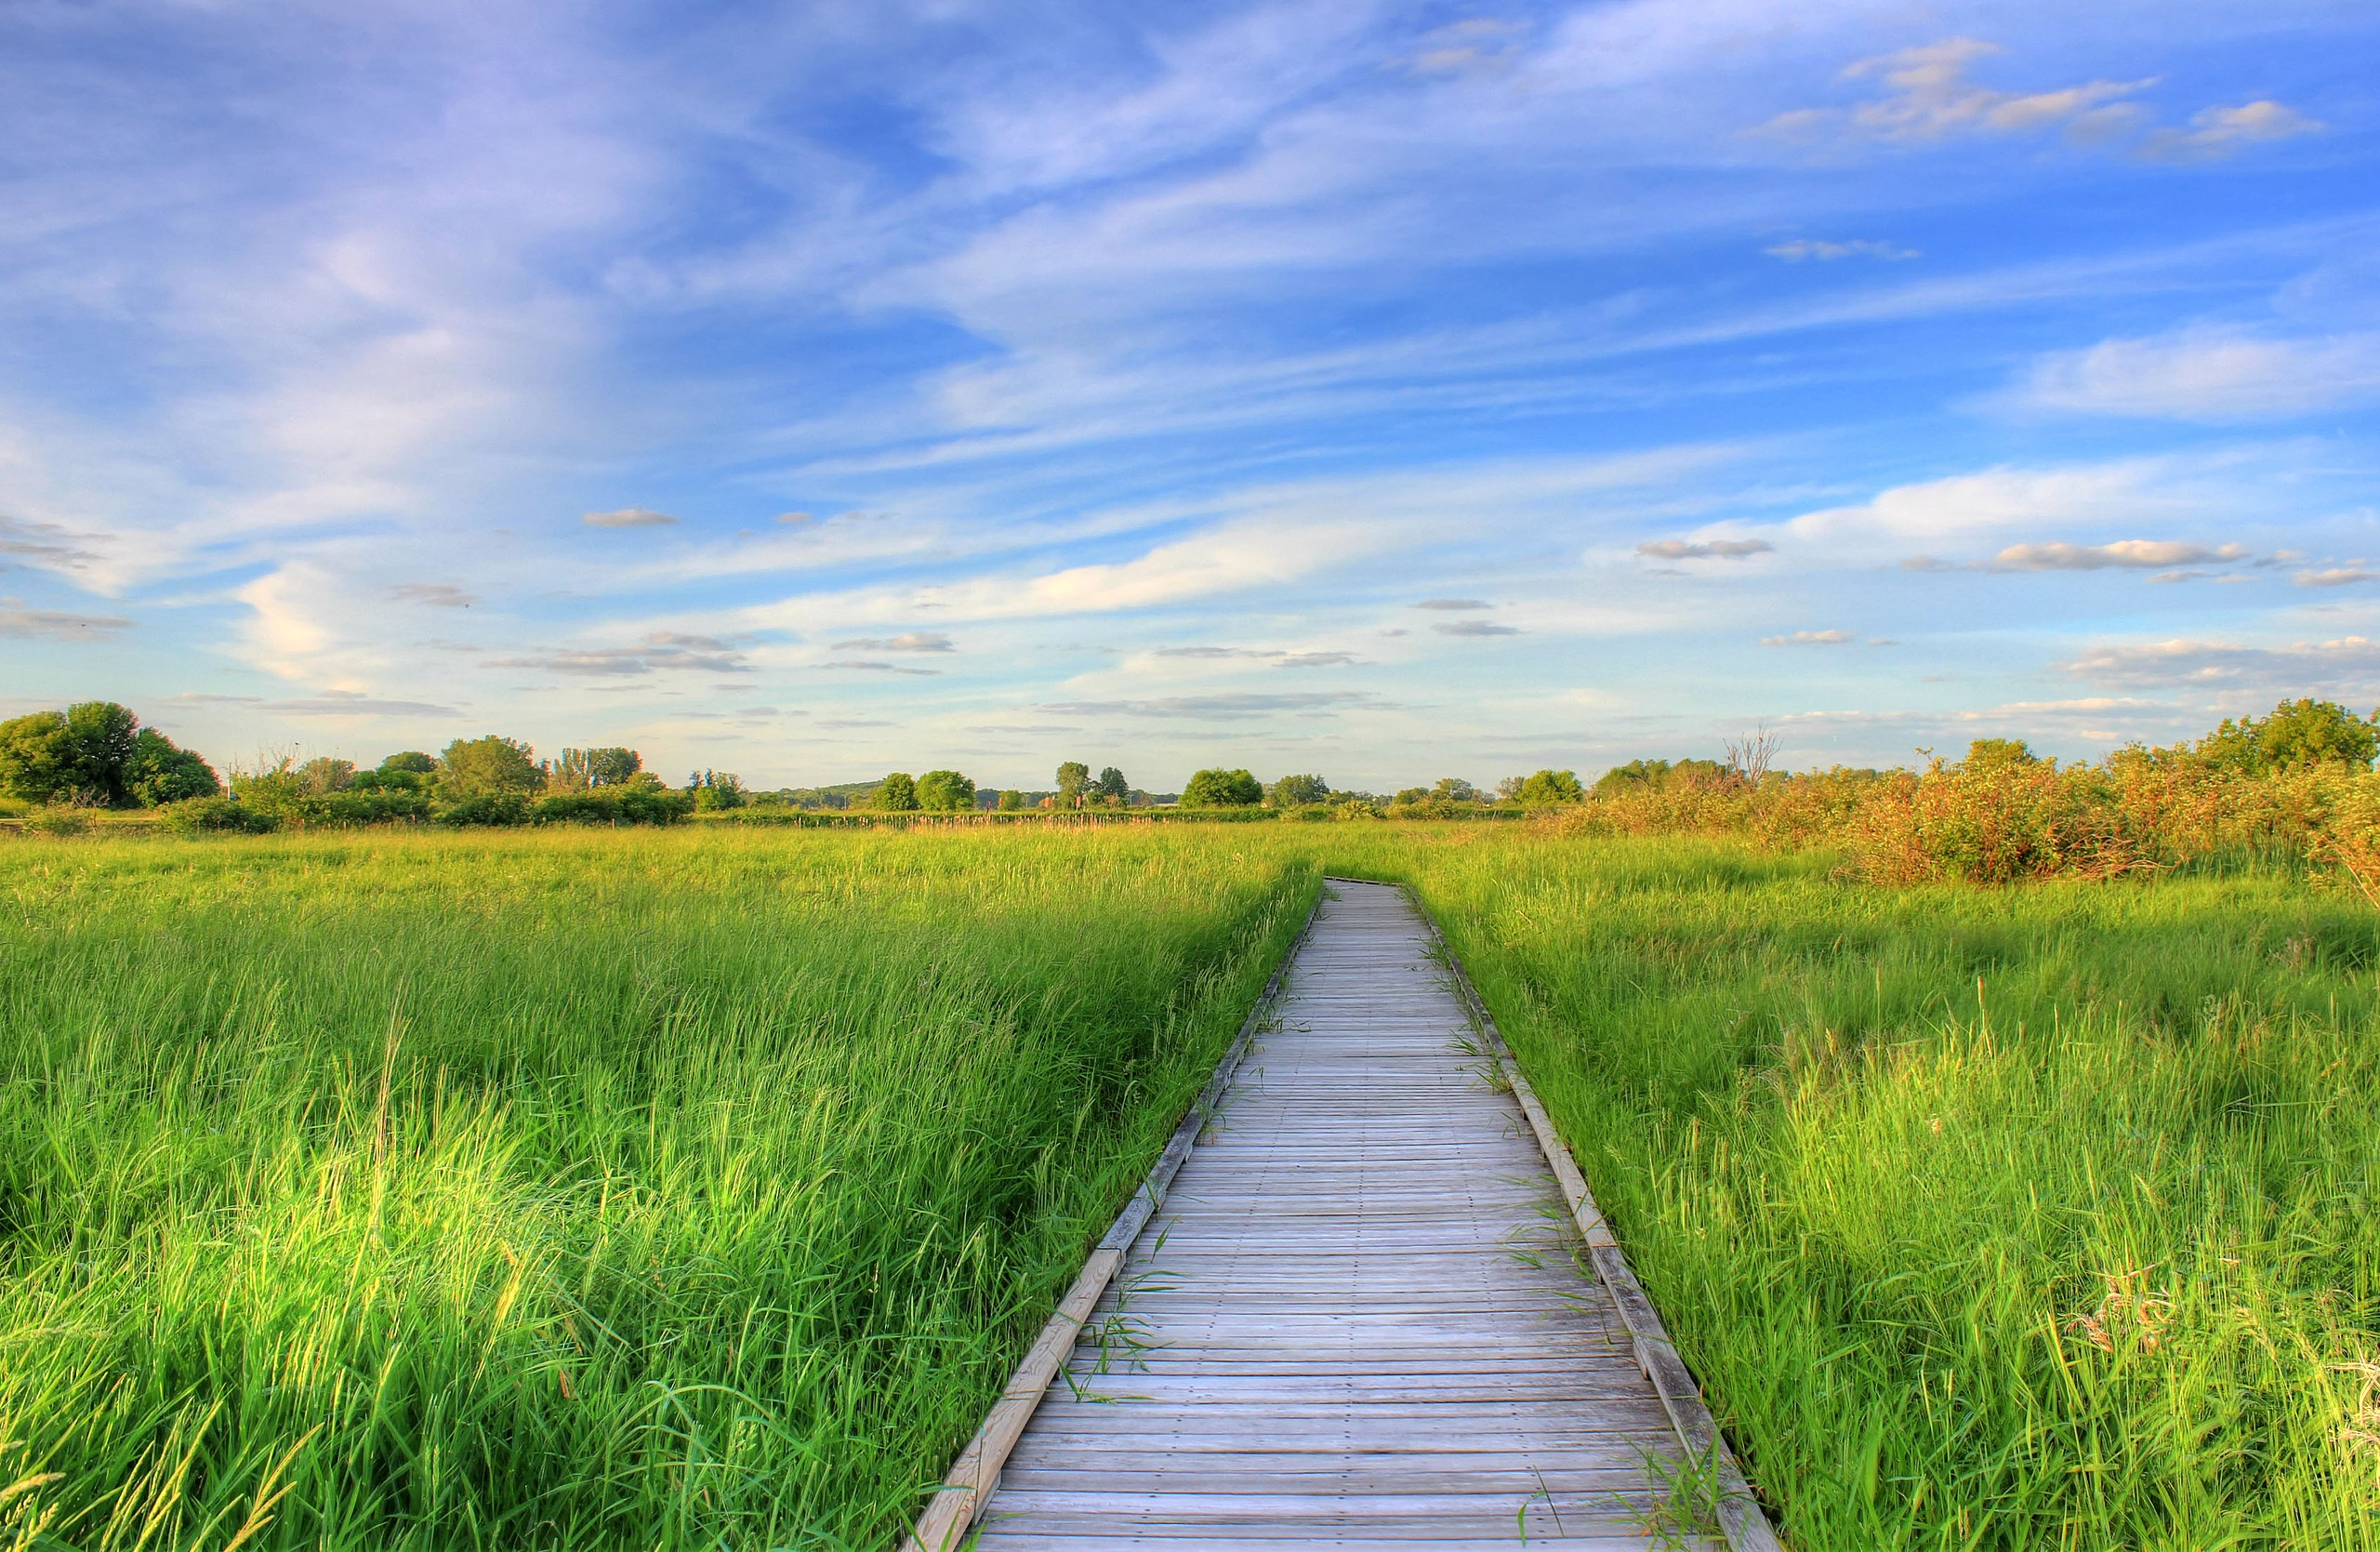

In [18]:
Image(img_1_url, width=480)

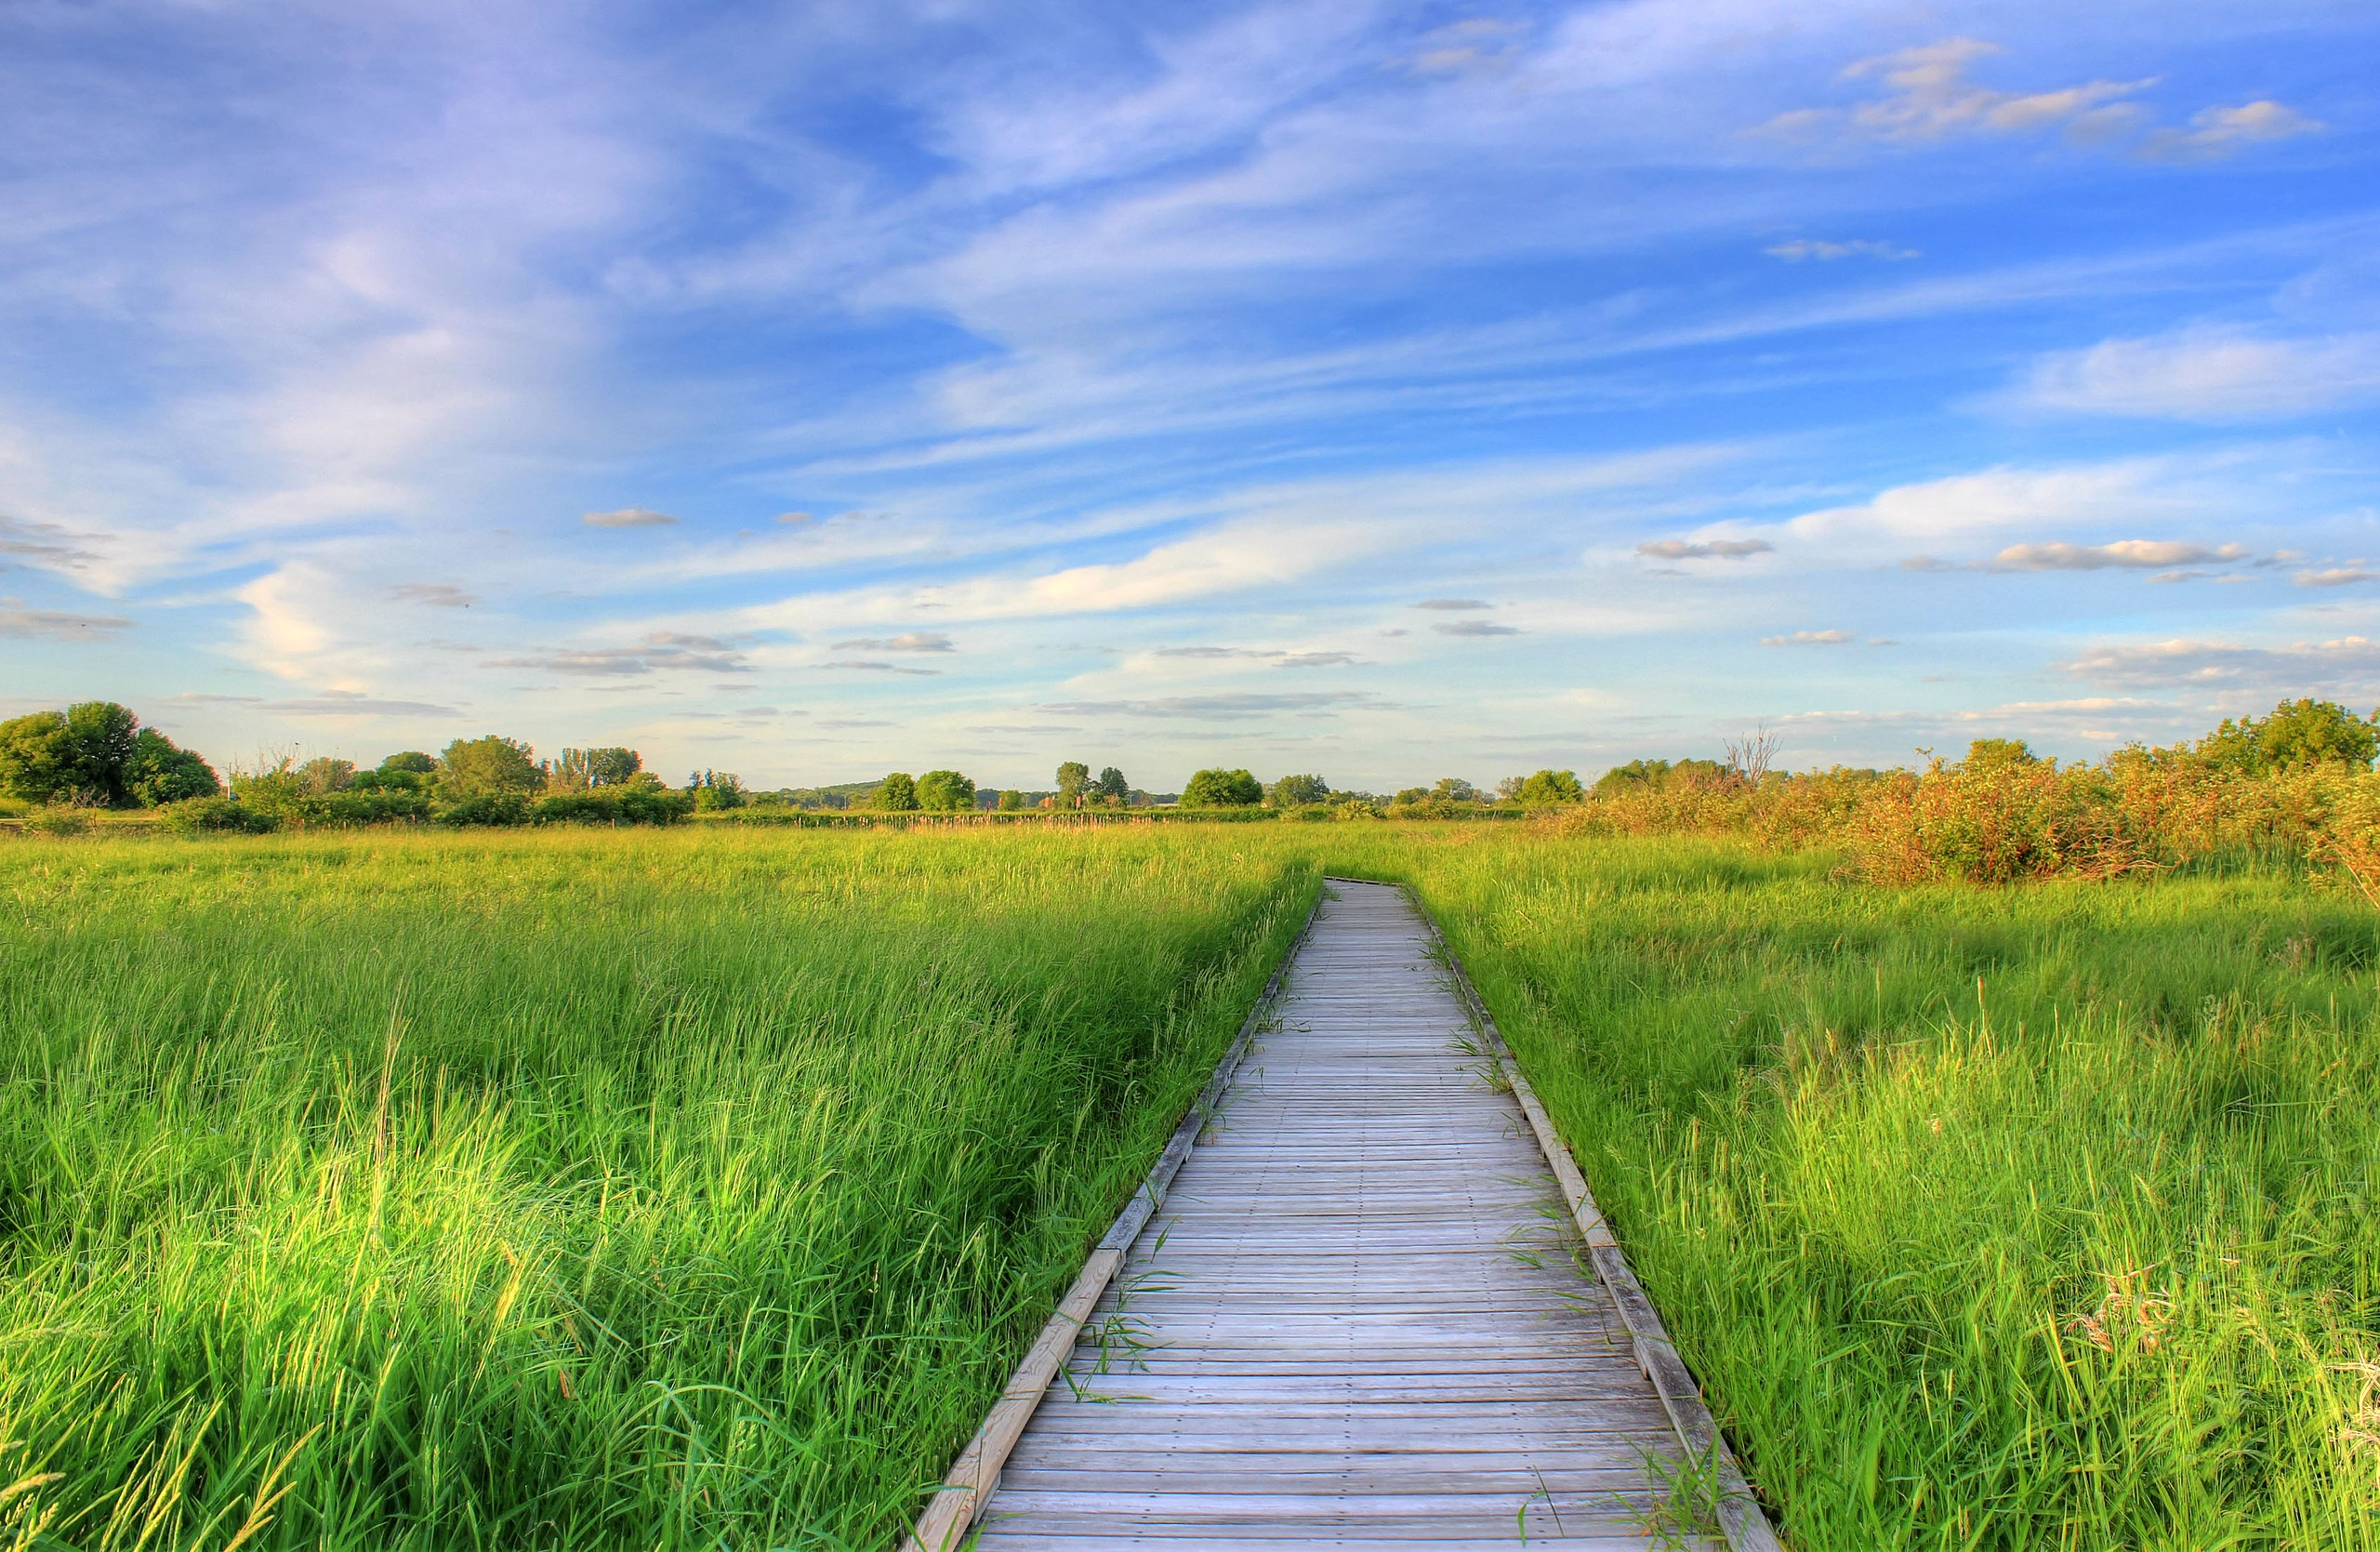

In [19]:
Image(img_2_url, width=480)

In [23]:
response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "이 이미지에는 무엇이 있나요? 이 이미지들 사이에 차이가 있나요?",
        },
        {
          "type": "image_url",
          "image_url": {
            "url": img_1_url,
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": img_2_url,
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [24]:
print(response.choices[0].message.content)

이미지에는 나무 판자로 된 길이 푸른 초원을 지나는 모습이 보입니다. 하늘은 맑고 구름이 조금 떠 있으며, 자연경관이 매우 평화롭고 아름다워 보입니다. 제공하신 두 이미지 사이에 눈에 띄는 차이점은 없습니다. 두 이미지는 동일해 보이며 이는 동일한 사진의 중복일 수 있습니다.


## 이미지 이해 해상도 조절
세부 사항 파라미터를 조절함으로써, 사용자는 모델이 이미지를 처리하고 텍스트로 이해하는 방식을 제어할 수 있습니다. 이 파라미터에는 낮음(low), 높음(high), 자동(auto)의 세 가지 옵션이 있습니다. 기본적으로 모델은 자동 설정을 사용하며, 입력된 이미지의 크기를 바탕으로 낮은 설정 또는 높은 설정을 결정합니다.

- `low`은 “고해상도” 모델을 비활성화합니다. 모델은 512px x 512px 해상도의 이미지를 받아서 65 토큰의 예산으로 이미지를 표현합니다. 이는 고해상도의 세부 사항이 필요하지 않은 사용 사례에 더 빠른 응답을 제공하고, 입력 토큰을 적게 소비하게 합니다.
- `high`은 “고해상도” 모드를 활성화합니다. 이 모드는 먼저 모델에게 낮은 해상도 이미지를 보여주고, 입력 이미지 크기에 기반하여 512px 정사각형의 세부적인 크롭을 생성합니다. 각 세부 크롭은 토큰 예산의 두 배인 65토큰(총 129 토큰)을 사용합니다.

In [25]:
response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "이 이미지 설명해줘"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
            "detail": "high"
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

In [26]:
print(response.choices[0].message.content)

이 이미지는 목재로 만든 길이 푸른 잔디와 덤불이 우거진 자연환경을 가로질러 이어져 있는 장면을 보여주고 있습니다. 길은 사진 아래쪽에서 시작하여 가운데를 향해 직선으로 뻗어 있고, 사진의 중앙선을 따라 하늘까지 이어지는 시각적인 효과를 줍니다. 하늘은 맑고 푸른빛이 돌며, 몇 개의 하얀 구름이 떠 있습니다. 사진은 아마도 늦봄이나 초여름에 찍은 것으로 추측되며, 자연적인 아름다움과 평화로운 분위기를 전달합니다.
